In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Modules

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [4]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')
print (labels[:5])
paths[:5]


Dataset is Loaded
['disgust', 'disgust', 'disgust', 'disgust', 'disgust']


['/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_haze_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_fat_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_cab_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_back_disgust.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_disgust/YAF_came_disgust.wav']

### Creating a DataFrame

In [5]:
df=pd.DataFrame()
df['Speech']=paths
df['labels']=labels

df.head()

,Speech,labels
0,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
1,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
2,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
3,/content/drive/MyDrive/TESS Toronto emotional ...,disgust
4,/content/drive/MyDrive/TESS Toronto emotional ...,disgust


In [6]:
df['labels'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5595    False
5596    False
5597    False
5598    False
5599    False
Name: labels, Length: 5600, dtype: bool

In [7]:
print(df['labels'].dtype)

object


In [8]:
df['labels'].value_counts()

disgust    800
happy      800
ps         800
sad        800
neutral    800
angry      800
fear       800
Name: labels, dtype: int64

## Explorartory Data Analysis

### Label Encoding

In [9]:
df['labels']# as the labels are object we need to convert then to int64 for plotting and other purpose so we use label encoding

0       disgust
1       disgust
2       disgust
3       disgust
4       disgust
         ...   
5595    neutral
5596    neutral
5597    neutral
5598    neutral
5599    neutral
Name: labels, Length: 5600, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the labels to numerical values
df['labels_encoded'] = label_encoder.fit_transform(df['labels'])



In [11]:
df['labels_encoded']# as this numerical values cant be plotted we change it into one hot vectors

0       1
1       1
2       1
3       1
4       1
       ..
5595    4
5596    4
5597    4
5598    4
5599    4
Name: labels_encoded, Length: 5600, dtype: int64

<Axes: ylabel='count'>

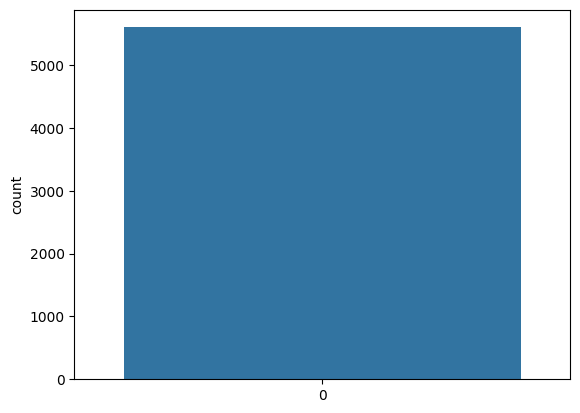

In [12]:
sns.countplot(df['labels_encoded'])

In [13]:
# Convert the encoded labels to one-hot vectors

one_hot_encoded = pd.get_dummies(df['labels'])
one_hot_encoded

,angry,disgust,fear,happy,neutral,ps,sad
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
5595,0,0,0,0,1,0,0
5596,0,0,0,0,1,0,0
5597,0,0,0,0,1,0,0
5598,0,0,0,0,1,0,0


<Axes: ylabel='count'>

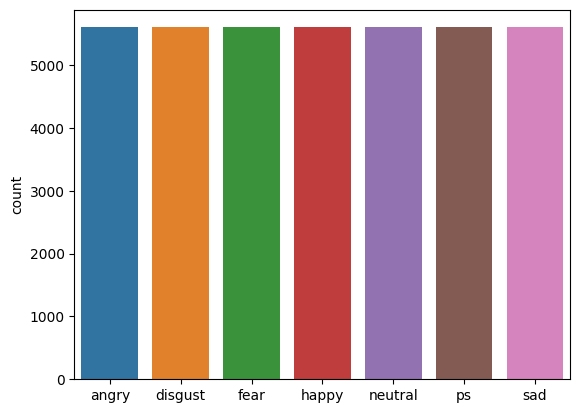

In [14]:
sns.countplot(one_hot_encoded)

In [15]:
df

,Speech,labels,labels_encoded
0,/content/drive/MyDrive/TESS Toronto emotional ...,disgust,1
1,/content/drive/MyDrive/TESS Toronto emotional ...,disgust,1
2,/content/drive/MyDrive/TESS Toronto emotional ...,disgust,1
3,/content/drive/MyDrive/TESS Toronto emotional ...,disgust,1
4,/content/drive/MyDrive/TESS Toronto emotional ...,disgust,1
...,...,...,...
5595,/content/drive/MyDrive/TESS Toronto emotional ...,neutral,4
5596,/content/drive/MyDrive/TESS Toronto emotional ...,neutral,4
5597,/content/drive/MyDrive/TESS Toronto emotional ...,neutral,4
5598,/content/drive/MyDrive/TESS Toronto emotional ...,neutral,4


### Wave plot and Spectogram

In [16]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()


def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()


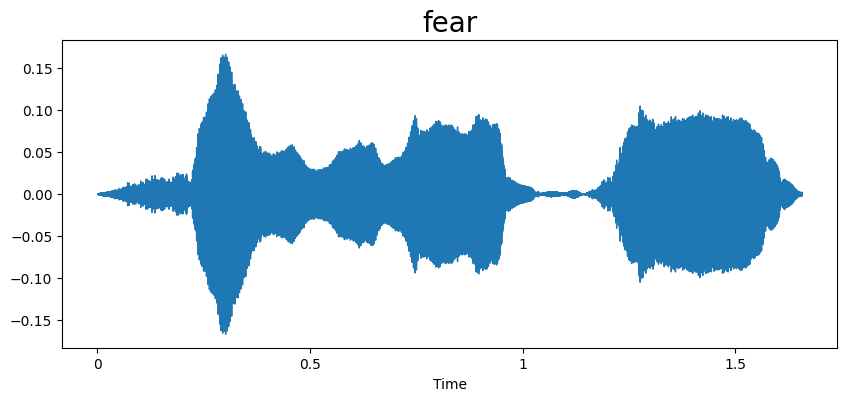

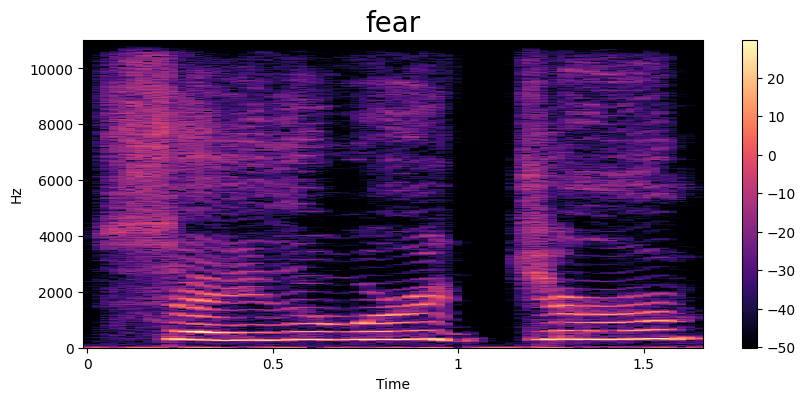

In [17]:
emotion='fear'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


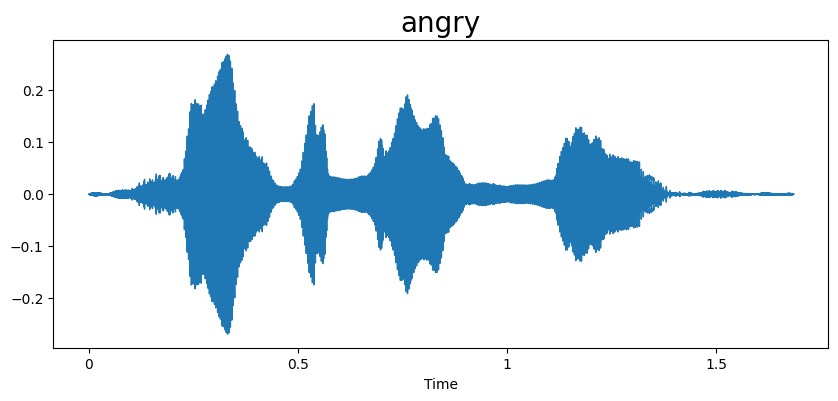

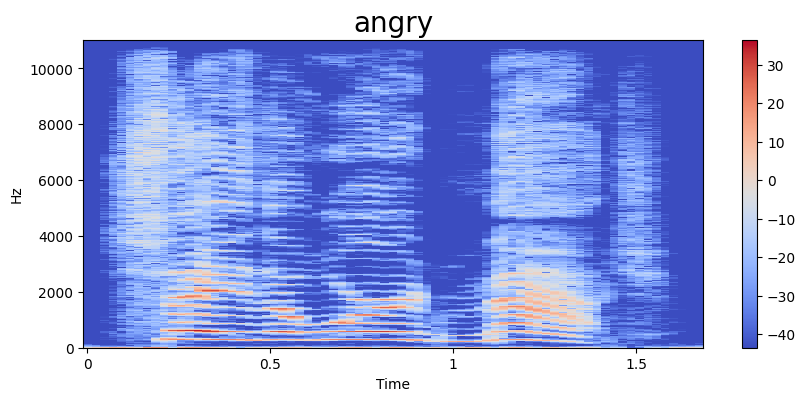

In [18]:
emotion='angry'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


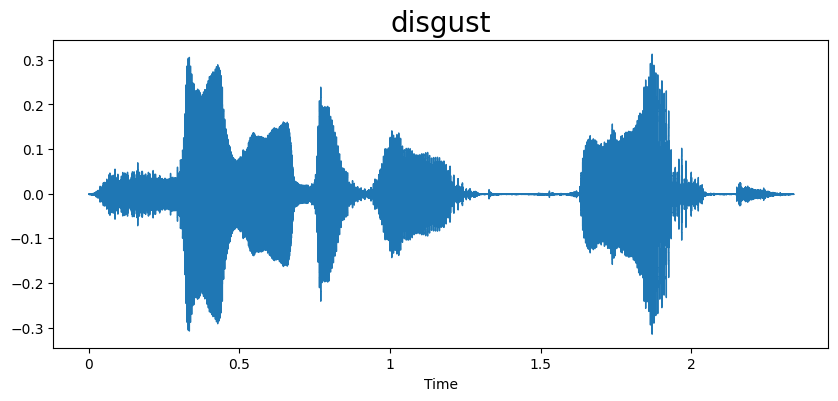

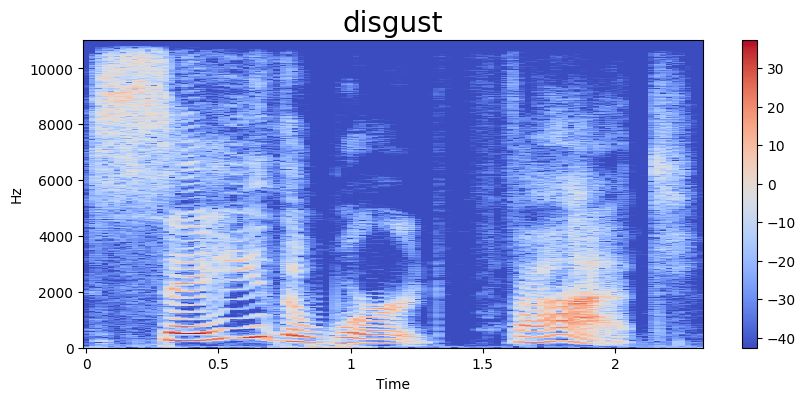

In [19]:
emotion='disgust'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


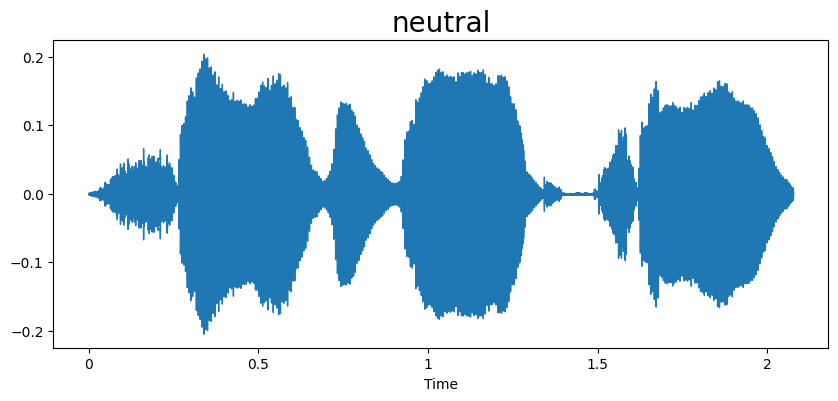

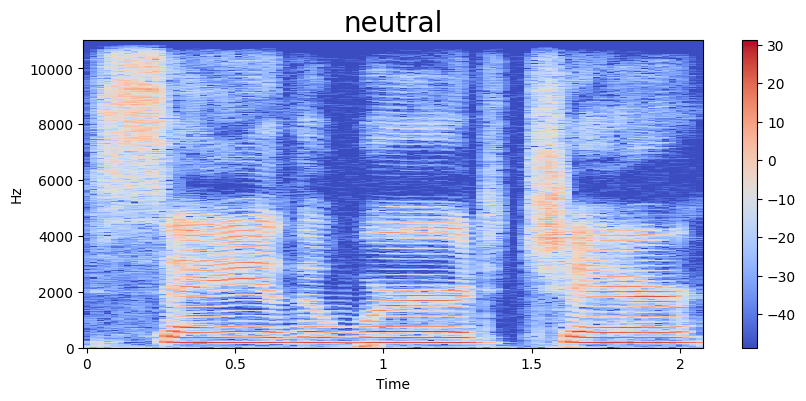

In [20]:
emotion='neutral'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


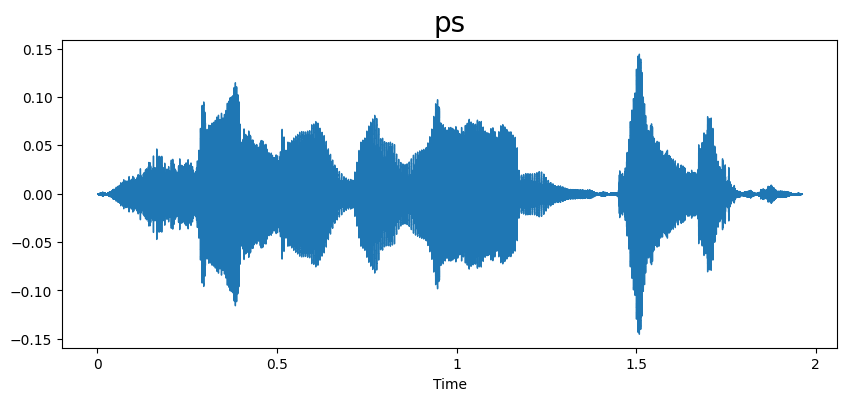

In [ ]:
emotion='ps'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


In [ ]:
emotion='sad'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


In [ ]:
emotion='happy'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


### Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['Speech'][6])

In [ ]:
x_mfcc=df['Speech'].apply(lambda x:extract_mfcc(x))

In [ ]:
x_mfcc

In [ ]:
# change into a 2D array
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

In [ ]:
X=np.expand_dims(X,-1)
X.shape

In [ ]:
from keras.utils import to_categorical
y=to_categorical(df['labels_encoded'])
y.shape

In [ ]:
y

### Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

## Train the model

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

### Plot the model

### Train and Val accuracy

In [ ]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='Train Accuracy')
plt.plot(epochs,val_acc,label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Loss

In [ ]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()